In [2]:
import numpy as np
import tensorflow
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


In [56]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    
    number = 10000
    x_train = x_train[:number]
    y_train = y_train[:number]
    x_train = x_train.reshape(number, 28*28)
    x_test = x_test.reshape(x_test.shape[0], 28*28)    
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    
    x_test = np.random.normal(x_test)
    # convert category to one hot encoding
    
    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)

    #normalize training data
    x_train = x_train / 255
    x_test = x_test / 255
    
    return (x_train, y_train), (x_test, y_test)

In [57]:
(x_train, y_train), (x_test, y_test) = load_data()

In [62]:
model = Sequential()
model.add(Dense(input_dim = 28*28, units = 333, activation = 'relu'))


model.add(Dense(units = 333, activation = 'relu'))

model.add(Dense(units = 10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = SGD(lr = 0.12), metrics = ['accuracy'])

model.fit(x_train, y_train, batch_size = 100, epochs = 20)


Epoch 1/20
10000/10000 [==============================] - 0s 24us/step - loss: 0.7712 - accuracy: 0.7911
Epoch 2/20
10000/10000 [==============================] - 0s 18us/step - loss: 0.3394 - accuracy: 0.9047
Epoch 3/20
10000/10000 [==============================] - 0s 17us/step - loss: 0.2650 - accuracy: 0.9249
Epoch 4/20
10000/10000 [==============================] - 0s 17us/step - loss: 0.2144 - accuracy: 0.9389
Epoch 5/20
10000/10000 [==============================] - 0s 17us/step - loss: 0.1848 - accuracy: 0.9460
Epoch 6/20
10000/10000 [==============================] - 0s 18us/step - loss: 0.1577 - accuracy: 0.9556
Epoch 7/20
10000/10000 [==============================] - 0s 17us/step - loss: 0.1373 - accuracy: 0.9609
Epoch 8/20
10000/10000 [==============================] - 0s 17us/step - loss: 0.1176 - accuracy: 0.9664
Epoch 9/20
10000/10000 [==============================] - 0s 18us/step - loss: 0.1048 - accuracy: 0.9706
Epoch 10/20
10000/10000 [==============================

In [55]:
score = model.evaluate(x_train, y_train)
print('training acc : ' + str(score[1]))

score = model.evaluate(x_test, y_test)
print('training acc : ' + str(score[1]))

10000/10000 [==============================] - 0s 16us/step
training acc : 1.0
10000/10000 [==============================] - 0s 14us/step
training acc : 0.963100016117096


(array([ 2.,  0.,  1.,  4.,  1.,  2.,  2.,  7.,  6.,  6., 13., 10., 17.,
        15., 19., 36., 37., 37., 30., 32., 44., 59., 42., 50., 47., 59.,
        44., 50., 44., 41., 38., 30., 43., 24., 20., 14., 19., 11.,  9.,
        10.,  2.,  8.,  5.,  2.,  2.,  1.,  3.,  0.,  0.,  2.]),
 array([-3.15151871, -3.02417018, -2.89682165, -2.76947312, -2.64212459,
        -2.51477606, -2.38742753, -2.260079  , -2.13273046, -2.00538193,
        -1.8780334 , -1.75068487, -1.62333634, -1.49598781, -1.36863928,
        -1.24129075, -1.11394222, -0.98659369, -0.85924516, -0.73189663,
        -0.6045481 , -0.47719957, -0.34985104, -0.22250251, -0.09515398,
         0.03219455,  0.15954308,  0.28689161,  0.41424014,  0.54158867,
         0.6689372 ,  0.79628573,  0.92363426,  1.0509828 ,  1.17833133,
         1.30567986,  1.43302839,  1.56037692,  1.68772545,  1.81507398,
         1.94242251,  2.06977104,  2.19711957,  2.3244681 ,  2.45181663,
         2.57916516,  2.70651369,  2.83386222,  2.96121075,

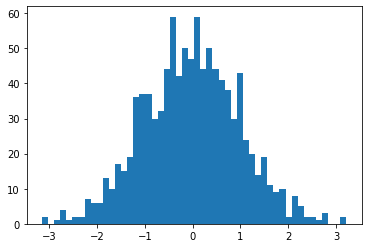

In [51]:
import matplotlib.pyplot as plt

mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(0,1, 1000)
plt.hist(s, bins = 50)